# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Axel Aguerreberry -  Ing. Sebastián Palacio
* Ing. Juan Manuel López


## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 

**CLASE 9** 

   Aprendizaje automático   
    
**Imágenes necesarias: 'Campo.jpg','daisy.jpg'**

 

# Aprendizaje automático

### Aprendizaje no supervisado
- Clustering

- Reconocimiento de patrones

### Aprendizaje supervisado
- Regresión

- Clasificación

### Aprendizaje semi supervisado
- Auto-aprendizaje/ Self-Learning

### Aprendizaje por refuerzos

- penalizaciones o refuerzos, se usa en juegos, por ejemplo


## Formalizamos un poco ...


Datos:

$\underline{x}_i=(x_{i1},..,x_{im}), \, m=$ variables/medidas/características

$i=1,..,n$, $n=$ cantidad de observaciones/registros/muestras/objetos

Luego todos los datos se guardan en una matriz con $n$ filas y $m$ columnas: 

$X=\begin{bmatrix}
 x_{1 1}& \cdots  & x_{1 m}\\ 
 \vdots &  \ddots &\vdots \\
 x_{n 1}& \cdots  & x_{n m}
\end{bmatrix}$


Cuando se tiene solo eso, es decir: $(\underline{x}_i)_{i=1..,n}$, $\rightarrow$ **Aprendizaje no supervisado**


Pero cuando se tiene:
$(\underline{x}_i,y_i)_{i=1..,n}$, $\rightarrow$ 

Es  decir $X=\begin{bmatrix}
 x_{1 1}& \cdots  & x_{1 m}\\ 
 \vdots &  \ddots &\vdots \\
 x_{n 1}& \cdots  & x_{n m}
\end{bmatrix}$ 
y además $y=(y_{1},..,y_{n})$, cada fila  con su etiqueta, 


se trata de **Aprendizaje supervisado**

Donde:  $y_i$ target u objetivo, etiqueta

Cuando:

- $y_i\in R$, numérica, $\rightarrow$ Regresión 
- $y_i\in \{c_1,,..,c_k\}$, categórica, $\rightarrow$ Clasificación, donde $k=$ cantidad de clases.

El **Aprendizaje** busca predecir o "adivinar" la etiqueta. 

Cuando se tiene:

$(\underline{x}_i,y_i)_{i=1..,n_e}$, $(\underline{x}_i)_{i=1..,n_n}$,con $n_n >> n_e$  $\rightarrow$ Aprendizaje semi-supervisado



**Veamos un ejemplo de datos disponibles:**

Para esto usaremos librerías útiles 

para orden y manejo de datos:
 
 **pandas** 

para aprendizaje automático:

**scikit-learn: sklearn** 

In [77]:
#librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.datasets import load_wine

In [78]:
# Librerías para Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from collections import Counter

In [79]:
datos = load_wine() #base de datos la guardamos en la variable data
print(type(datos))
print(type(datos.data))
print(type(datos.feature_names))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'list'>


In [80]:
print(np.shape(datos.data))
print(len(datos.feature_names))
print(datos.feature_names)

(178, 13)
13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [81]:
df = pd.DataFrame(datos.data, columns=datos.feature_names)
print(df.shape)
df.head(5)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**wine**  es un conjunto de datos clásico

Samples total	178

Dimensionality	13

Features	real, positive

Es decir, son n=178 registros (instancias o muestras) con m=13 característica/variable/feature numéricas reales positivas


(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)



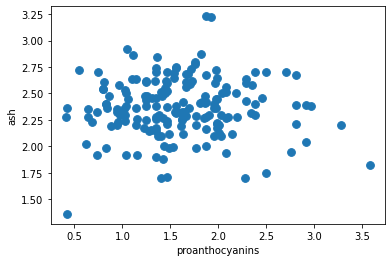

In [82]:
#scatterplot de a dos variables
var1, var2 = datos.feature_names[8] , datos.feature_names[2]#nombres de las variables/características

f1, f2 = df[var1].values, df[var2].values

plt.scatter(f1, f2, s=60)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

## Clasificación

Consiste en la asignación de una categoría a un objeto/individuo o a un conjunto de objetos/individuos .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos tenemos de estos y 
* cuales o cuantas serían las posibles categorias o clases.

Podemos diferenciar tres tipos de clasificación:

**Supervisada**, **No supervisada o Clustering**, **Semi supervisada**

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento.

En clasificación **No supervisada**  (en estadística también llamada clustering) no se conocen a priori datos ya clasificados. Se busca descubrir la estructura que poseen los datos, encontrando las clases naturales que se presentan. 

### Clasificación no supervisada, Clustering

ver [filminas Clasificación_CLustering](https://docs.google.com/presentation/d/1duJ5aJqbbvPFNjSkRvLpDS1B2MCv40AKQxQM34KoEO4/edit?usp=sharing)

Describimos algunos brevemente


#### K-means o k-medias 
es un método automático de clasificación no supervisada. En este caso K es la cantidad de clases, es un parámetro del algoritmo, el usuario lo tiene que elgir.
* genera aleatoriamente K centroides en el espacio de las variables (dimensión n=cantidad de variables/features).
* clasifica los datos en K clases por cercanía (menor distancia euclídea) a los centroides.
* recalcula los K centroides usando el centro de masa (promedio) de cada clase.
* se repite el proceso de clasificación y recálculo de los centroides hasta la estabilidad (K clases estables)


#### DBSCAN: Density Based Spatial Clustering of Aplications with Noise

* NO es necesario definirle la cantidad de grupos/clusters 
* Hiperparámetros: eps (o radio de búsqueda) y min_samples (Rule of thumb: min_samples ≥ D + 1, donde D es la cantidad de variables) 



#### Mean Shift 
* NO es necesario definirle la cantidad de grupos/clusters 
* Hiperparámetros: radio de búsqueda y criterio de parada

útil en imágenes para encontrar segmentos con pixeles cercanos espacialmente y similares entre si (para esto hay que usar las variables de la ubicación también: filas y columnas)

In [83]:
# Se agrupan los datos usando Kmedias en 4 clusters (cantidad elegida según el criterio del codo (Elbow method))
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df_clusters=df.copy() #nuevo Data Frame
df_clusters['kmedias_4']=kmeans.labels_
df_clusters.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


**Se grafican los resultados de Kmedias, de a dos variables por vez**

se grafican de a dos (dimensión 2)


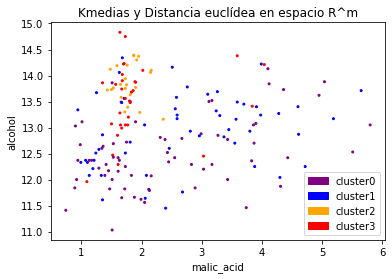

In [84]:
#import matplotlib.patches as mpatches

colores=['purple','blue','orange','red'] #un color por cada cluster encontrado
variables=datos.feature_names

variable1=variables[1]
variable2=variables[0]

f1 = df_clusters[variable1].values
f2 = df_clusters[variable2].values
f3 = df_clusters.kmedias_4

asignar=[]
l=len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=4)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster0')
patch2 = mpatches.Patch(color=colores[1], label='cluster1')
patch3 = mpatches.Patch(color=colores[2], label='cluster2')
patch4 = mpatches.Patch(color=colores[3], label='cluster3')
plt.legend(handles=[patch1,patch2,patch3,patch4])
plt.title('Kmedias y Distancia euclídea en espacio R^m')
plt.show()

**Normalizamos, escalamos, estandarizamos las variables?** conviene primero estandarizar (z-score, o "normalizar") por columna. O llevar a cada variable a un intervalo de valores común, es decir por columna.

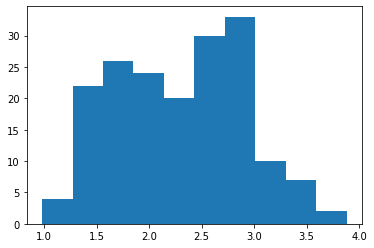

In [85]:
X=datos.data # datos puros
plt.hist(X[:,5]) #histograma de los datos de una variable o columna
plt.show()

In [86]:
from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit(X) #resta la media  de cada columna y luego divide por el desvío
X_scaled=std_scale.transform(X) # media 0 y desvío 1 por columnas

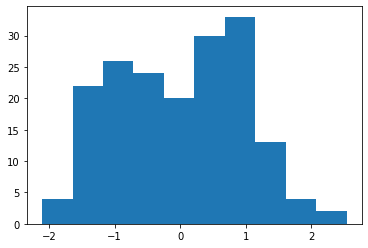

In [87]:
plt.hist(X_scaled[:,5]) #histograma de los datos de una variable (columna) luego de estandarizar
plt.show()

In [88]:
kmeans_n = KMeans(n_clusters=4)
kmeans_n.fit(X_scaled) #fiteo, ejecuto el algoritmo usando la base estandarizada o normalizada por columnas

df_clusters['kmedias_base_normalizada']=kmeans_n.labels_
df_clusters.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4,kmedias_base_normalizada
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,3,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,1


**DBSCAN, Opcional**

In [89]:
min_samples = df.shape[1]+1 #  Rule of thumb: min_samples ≥ m + 1
#min_samples=14
dbscan = DBSCAN(eps=10.5, min_samples=min_samples).fit(df) # se define y ajusta (fitea) el modelo
df_clusters['dbscan']=dbscan.labels_

print('cantidad de datos por cluster: ',Counter(dbscan.labels_))
df_clusters.head()

cantidad de datos por cluster:  Counter({-1: 178})


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4,kmedias_base_normalizada,dbscan
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,-1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,-1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,3,2,-1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3,2,-1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,1,-1


In [90]:
min_samples = df.shape[1]+1 #  Rule of thumb: min_samples ≥ m + 1
#min_samples=14
dbscan2 = DBSCAN(eps=2.5, min_samples=min_samples).fit(X_scaled) # se define y ajusta (fitea) el modelo
df_clusters['dbscan_datos_std']=dbscan2.labels_

print('cantidad de datos por cluster: ',Counter(dbscan2.labels_))
df_clusters.head()

cantidad de datos por cluster:  Counter({0: 97, -1: 48, 1: 33})


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4,kmedias_base_normalizada,dbscan,dbscan_datos_std
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,-1,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,-1,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,3,2,-1,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3,2,-1,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,1,-1,0


En este ejemplo (wine) cada registro ya está clasificado en una de 3 clases, es decir existe etiqueta, target 

Classes	3

Samples per class	[59,71,48]


In [91]:
print('y=',datos.target)
print(type(datos.target))
print(len(datos.target))
print(datos.target_names)

y= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>
178
['class_0' 'class_1' 'class_2']


Es decir:

$y_i \in \{\text{'class_0', 'class_1','class_2'} \}$
o bien

$y_i \in \{0,1,2\}$

**si queremos predecir esa etiqueta podemos usar aprendizaje supervizado**, lo veremos próxima clase



cantidad de observaciones: 178
cantidad de clases: 3
cantidad de variables/dimension: 13
se grafican de a dos (dimensión 2)


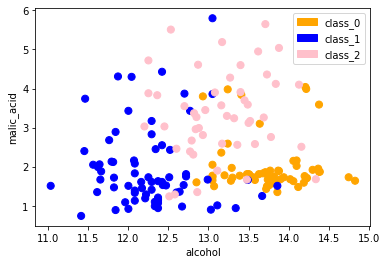

In [92]:
#import matplotlib.patches as mpatches
variable1=datos.feature_names[0]
variable2=datos.feature_names[1]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = datos.target

colores=['orange','blue','pink']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label=datos.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=datos.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=datos.target_names[2])
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

Ahora usaremos ese conocimiento para evaluar/entender que encontró kmedias, no es fácil evaluar algoritmos no supervisados si no se tiene un conocimiento de dominio o de los datos.

Es muy importante el **conocimiento del experto**, entender/conocer los datos con los cuales se trabaja.

In [93]:
pd.crosstab(index=datos.target,
            columns=df_clusters['kmedias_4'])#, margins=True)

kmedias_4,0,1,2,3
row_0,,,,
0,27,0,9,23
1,4,49,18,0
2,1,17,30,0


In [94]:
pd.crosstab(index=datos.target,
            columns=df_clusters['kmedias_base_normalizada'])#, margins=True)

kmedias_base_normalizada,0,1,2,3
row_0,,,,
0,0,4,55,0
1,1,26,0,44
2,48,0,0,0


## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**
* **Asignar una región de pixeles a una categoría (Clasificación basada en objetos (Object-Based Image Analysis – OBIA))**

Seguimos con Clasificación dentro de una imagen

Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

**Ejemplo: Imagen monocroma**

El ejemplo más simple es cuando la imagen es monocroma una sola medida para cada pixel: la intensidad.

**2 clases: binarización**

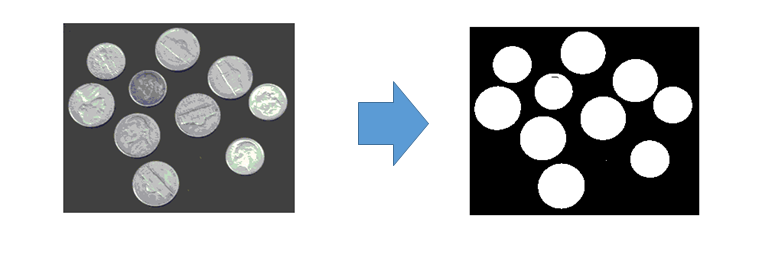

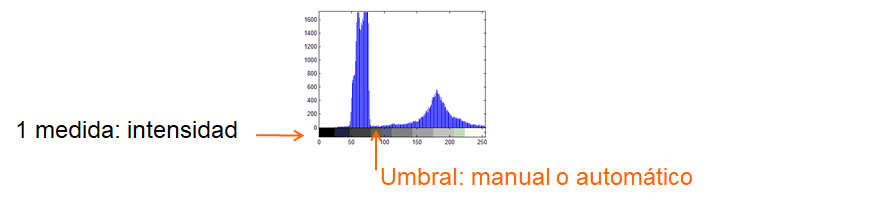

Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos).

**Ejemplos:** 

- Imágenes a color RGB,  cada pixel $(x_r, x_g, x_b)$, 3 variables
- Imágenes satelitales: cada pixel tiene B datos, donde B es la cantidad de bandas o sensores del satélite.

Se pueden usar las B bandas y/o combinaciones de éstas, como por ejemplo, el NDVI (índice verde o de vegetación). 

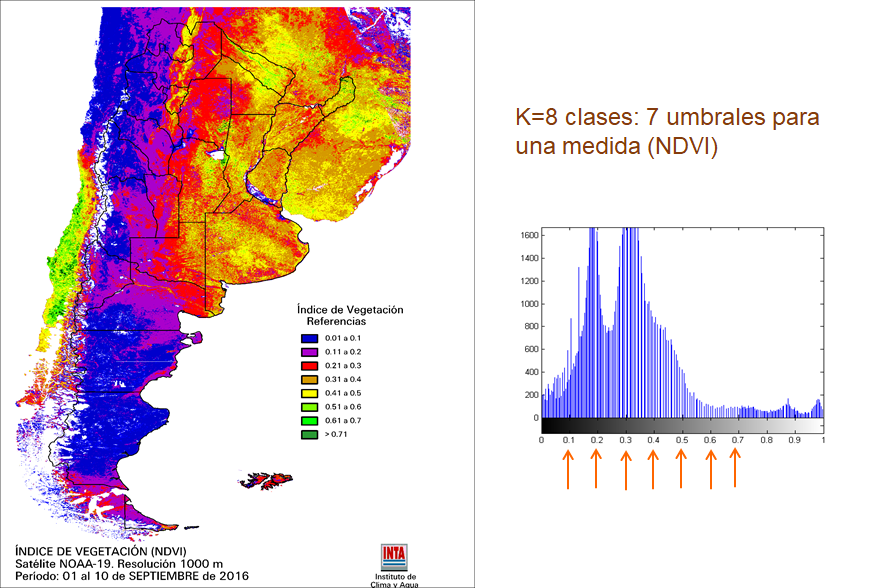


**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$ 

donde $IRC$ es el Infrarrojo cercano 
y $r$ es la componente roja (del visible)

In [95]:
import cv2

campo_cv=cv2.imread('Campo.png') #en BGR
print(campo_cv.size, 'cantidad de datos')
print(campo_cv.shape,' dimensión de la imagen')
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv #pasamos a RGB

515883 cantidad de datos
(359, 479, 3)  dimensión de la imagen


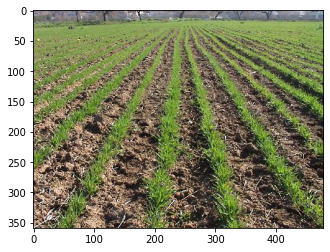

In [96]:

plt.imshow(campo)
plt.show()

In [97]:
print('un pixel particular, RGB:', campo[50,100,:])

un pixel particular, RGB: [119 125  77]


In [98]:
ind=np.indices((3,4)) #una capa con filas y otra con columnas
print(ind)


[[[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 1 2 3]
  [0 1 2 3]
  [0 1 2 3]]]


In [99]:
ind[0].flatten() #filas

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [100]:
#Pasamos a Data Frame # también pueden ver: https://stackoverflow.com/questions/49649215/pandas-image-to-dataframe Gracias Francisco!
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
ind=np.indices((cant_filas,cant_columnas)) # arreglo con matriz de filas y  matriz de columnas

cant_pixeles=cant_filas*cant_columnas
columnas=np.zeros([cant_pixeles,5],dtype='int')

data0=np.zeros([cant_pixeles,5],dtype='int')
data0[:,0]=ind[0].flatten() #filas
data0[:,1]=ind[1].flatten() #columnas
data0[:,2]=campo[:,:,0].flatten() #rojo
data0[:,3]=campo[:,:,1].flatten() # verde
data0[:,4]=campo[:,:,2].flatten() # azul

df = pd.DataFrame(data0, columns=["fila", "columna","rojo","verde","azul"])

print(df.shape)
print('Base de pixeles:')
df.head()        

(171961, 5)
Base de pixeles:


,fila,columna,rojo,verde,azul
0,0,0,186,155,161
1,0,1,202,171,176
2,0,2,190,159,165
3,0,3,203,172,177
4,0,4,189,160,164


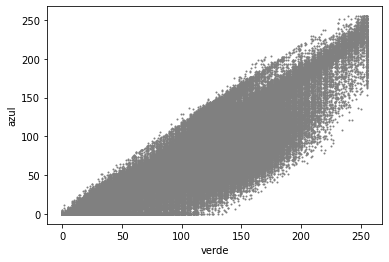

In [101]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

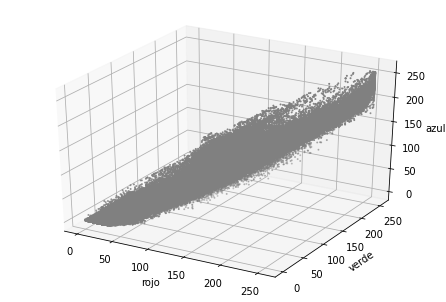

In [102]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()


**Se pueden agregar más capas/columnas de datos, por ejemplo**

* **combinar capas: dif_r-g, diferencia entre rojo y azul**
* **una capa con los bordes (Filtros Prewitt, Sobel, etc.)**
* **una capa con información de textura (Filtros de Gabor, etc.)**

**Ejercicio: agregar alguna/s** tener en cuenta si las operaciones son pixel a pixel o necesitan filtros espaciales

In [103]:
df['dif_r-g']=df["rojo"]-df["verde"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g
0,0,0,186,155,161,31
1,0,1,202,171,176,31
2,0,2,190,159,165,31
3,0,3,203,172,177,31
4,0,4,189,160,164,29


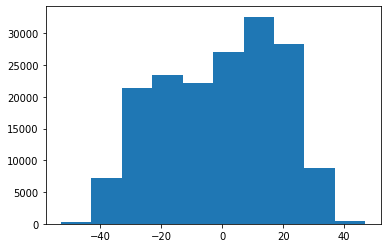

In [104]:
#Histograma
plt.hist(df['dif_r-g'])
plt.show()

### EJERCICIO: Agregar variables al DataFrame: Transformamos los datos RGB a otro espacio en el cual tenemos solo 1 canal y lo respresentamos.

In [105]:
df['dif_r-b']=df["rojo"]-df["azul"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b
0,0,0,186,155,161,31,25
1,0,1,202,171,176,31,26
2,0,2,190,159,165,31,25
3,0,3,203,172,177,31,26
4,0,4,189,160,164,29,25


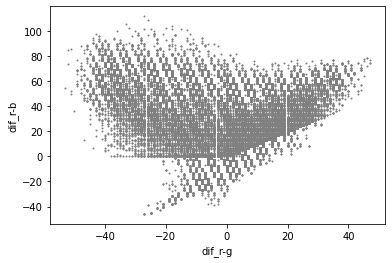

In [106]:
f1 = df["dif_r-g"].values
f2 = df["dif_r-b"].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel("dif_r-g")
plt.ylabel("dif_r-b")
plt.show()

# Descomposición ACP o PCA (Principal Components Analisis)

Pasar los datos a otro espacio para comprenderlos desde otro lugar

Análisis de Componentes Principales

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes

Se suele usar para reducir la dimensionalidad de los datos, la idea es que n_components sea "bastante" menos que la dimensión $m$ de lo datos pero que describan un buen porcentaje de la dispersión de estos.

Para más detalles y ejemplos pueden ver: https://programmathically.com/principal-components-analysis-explained-for-dummies/

Es una transformación de los datos en otro espacio (proyección/embedding). 

Las proyecciones o embeddings son útiles para quedarse con las características relevantes a nuestro problema (Selección de Características / Ingeniería de características) 

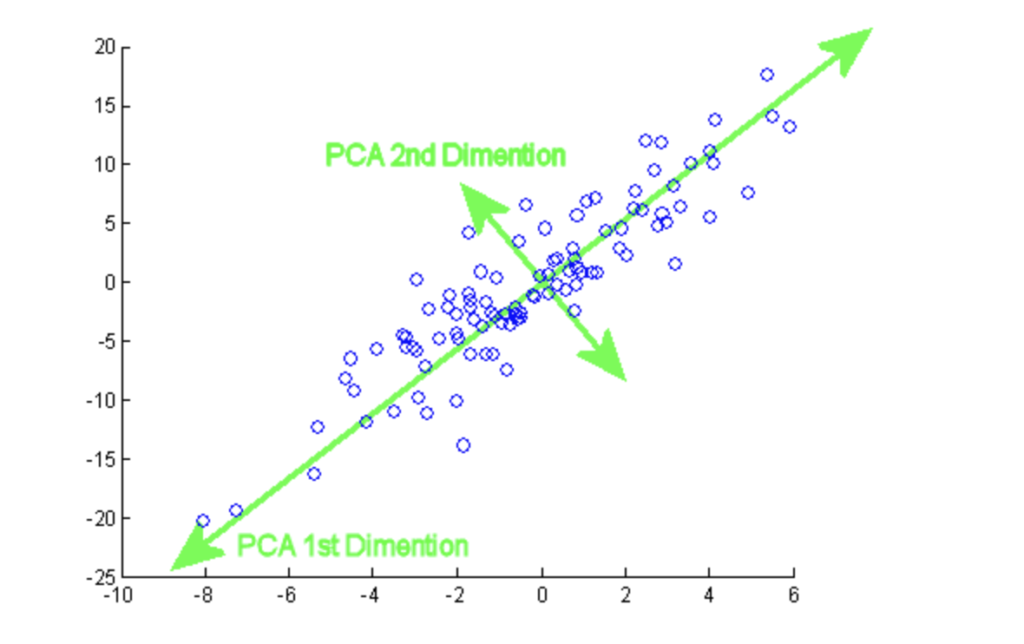

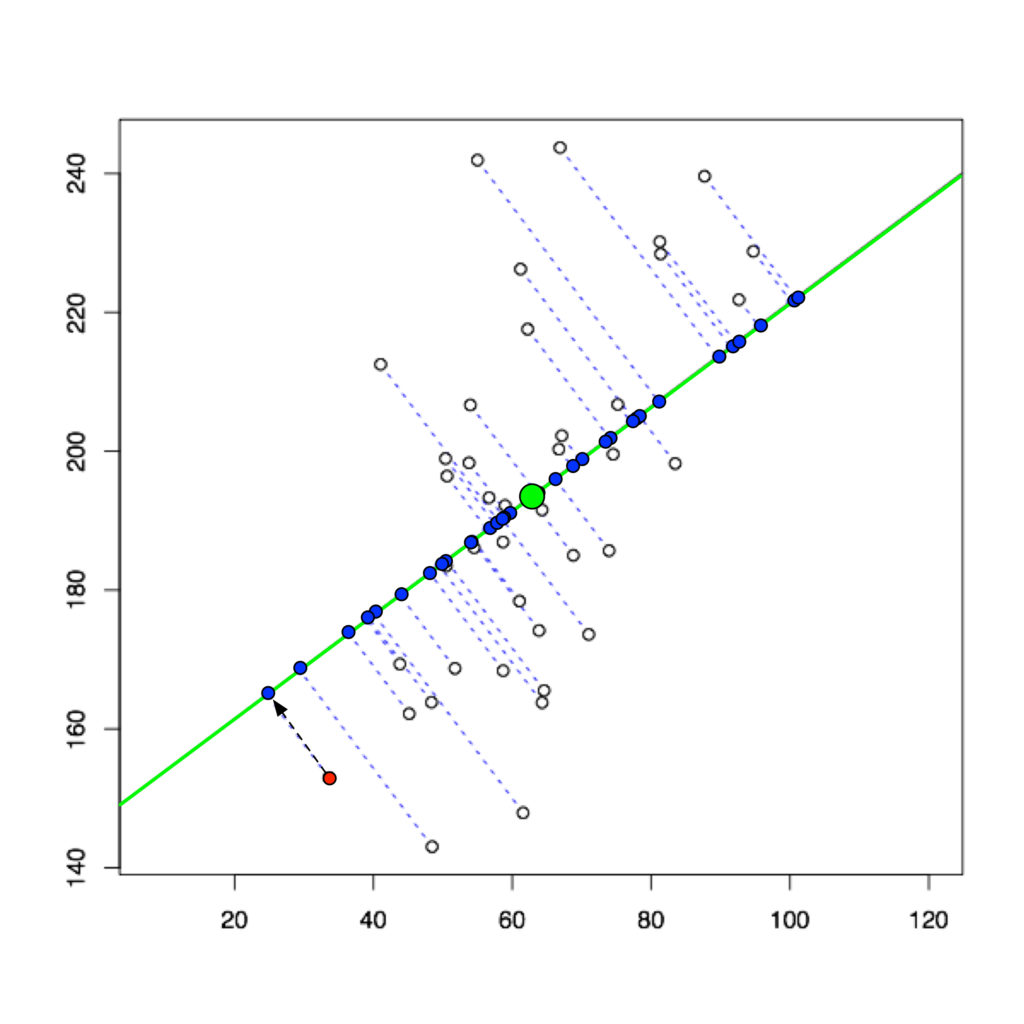

Primero me quedo con los datos puros, los llamo "x". El preproceso los centra en el eje y los normaliza variable por variable. Ahora cada variable RGB tiene dispersión 1

In [107]:
X=data0[:,2:5] # sólo r,g,b
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [108]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=3) #elegimos 3  pueden ser menos, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.93792779 0.05185796 0.01021425]
proporción de varianza por componente acumulada:  [0.93792779 0.98978575 1.        ]
tamaño de los datos:  (171961, 3)


**Ejercicio: graficar componentes 2 y 3**

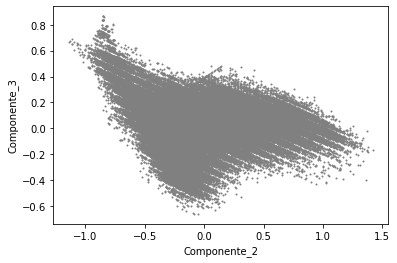

In [109]:
variable1="Componente_2"
variable2="Componente_3"

f1 = X_projected[:,1]
f2 = X_projected[:,2]

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

Ejercicio: Agregarlas al Data Frame

In [110]:
df["Componente_2"]=f1
df["Componente_3"]=f2
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b,Componente_2,Componente_3
0,0,0,186,155,161,31,25,-0.694558,-0.094485
1,0,1,202,171,176,31,26,-0.709092,-0.088869
2,0,2,190,159,165,31,25,-0.701839,-0.091011
3,0,3,203,172,177,31,26,-0.710912,-0.088000
4,0,4,189,160,164,29,25,-0.674969,-0.076517


**Ejercicio: realizar k-medias usando sólo las componentes 2 y 3, con k =3, mostrar el resultado como imagen**

In [111]:
df1=df[['Componente_2','Componente_3']].copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
df_clusters=df1.copy() 
df_clusters['kmedias_3']=kmeans.labels_
df_clusters.head()


,Componente_2,Componente_3,kmedias_3
0,-0.694558,-0.094485,2
1,-0.709092,-0.088869,2
2,-0.701839,-0.091011,2
3,-0.710912,-0.088000,2
4,-0.674969,-0.076517,2


In [73]:
variable1=datos.feature_names[0]
variable2=datos.feature_names[1]

f1 = df1[variable1].values
f2 = df1[variable2].values
f3 = datos.target

colores=['orange','blue','pink']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label=datos.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=datos.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=datos.target_names[2])
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

**Ejercicio: llevar la imagen Daisy a Data Frame y graficar en el espacio RGB o, mejor, 
generar una función que tome una imagen RGB y la pase a Data Frame y aplicárselo a Daisy**

In [41]:
import cv2

flor_cv=cv2.imread('daisy.jpg')
print(flor_cv.size, 'cantidad de datos')
print(flor_cv.shape,' dimensión de la imagen')
flor=flor_cv.copy()
flor[:,:,[2,1,0]]=flor_cv

386568 cantidad de datos
(354, 364, 3)  dimensión de la imagen


In [44]:
# FUNCION QUE TOMA IMAGEN RGB Y LA PASA A DATAFRAME


def aDF(img):
  dims=img.shape
  cant_filas=dims[0]
  cant_columnas=dims[1]
  ind=np.indices((cant_filas,cant_columnas))
  cant_pixeles=cant_filas*cant_columnas
  columnas=np.zeros([cant_pixeles,5],dtype='int')
  data0=np.zeros([cant_pixeles,5],dtype='int')
  data0[:,0]=ind[0].flatten() 
  data0[:,1]=ind[1].flatten()
  data0[:,2]=img[:,:,0].flatten() 
  data0[:,3]=img[:,:,1].flatten()
  data0[:,4]=img[:,:,2].flatten()
  df = pd.DataFrame(data0, columns=["fila", "columna","rojo","verde","azul"])
  return df


In [48]:
aDF(flor_cv)


,fila,columna,rojo,verde,azul
0,0,0,27,42,34
1,0,1,28,43,35
2,0,2,28,44,33
3,0,3,29,45,34
4,0,4,28,46,33
...,...,...,...,...,...
128851,353,359,39,71,47
128852,353,360,37,69,45
128853,353,361,37,69,45
128854,353,362,37,69,45


In [47]:
print(df.shape)
print('Base de pixeles:')
df.head()  

(171961, 7)
Base de pixeles:


,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b
0,0,0,186,155,161,31,25
1,0,1,202,171,176,31,26
2,0,2,190,159,165,31,25
3,0,3,203,172,177,31,26
4,0,4,189,160,164,29,25
